In [1]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .02  # step size in the mesh

ModuleNotFoundError: No module named 'sklearn'

# k Nearest Neighbor classification

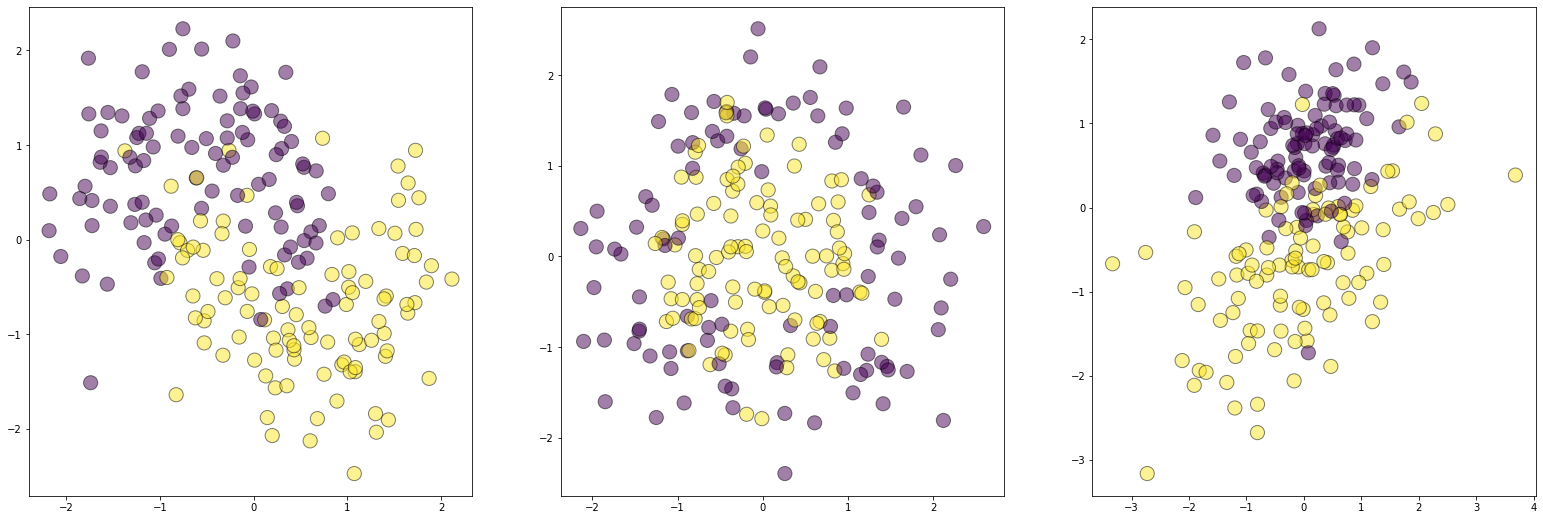

In [ ]:
# Create 3 datasets
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, n_samples=200)
# rng = np.random.RandomState(2)
# X += rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0, n_samples=200),
            make_circles(noise=0.3, factor=0.5, random_state=1, n_samples=200),
            linearly_separable]

# Visualize the datasets
figure = plt.figure(figsize=(27, 9))
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    ax = plt.subplot(1, len(datasets), ds_cnt+1)
    ax.scatter(X[:, 0],
               X[:, 1],
               c=y,
               s=200,
               edgecolors='k',
               alpha=0.5
              )

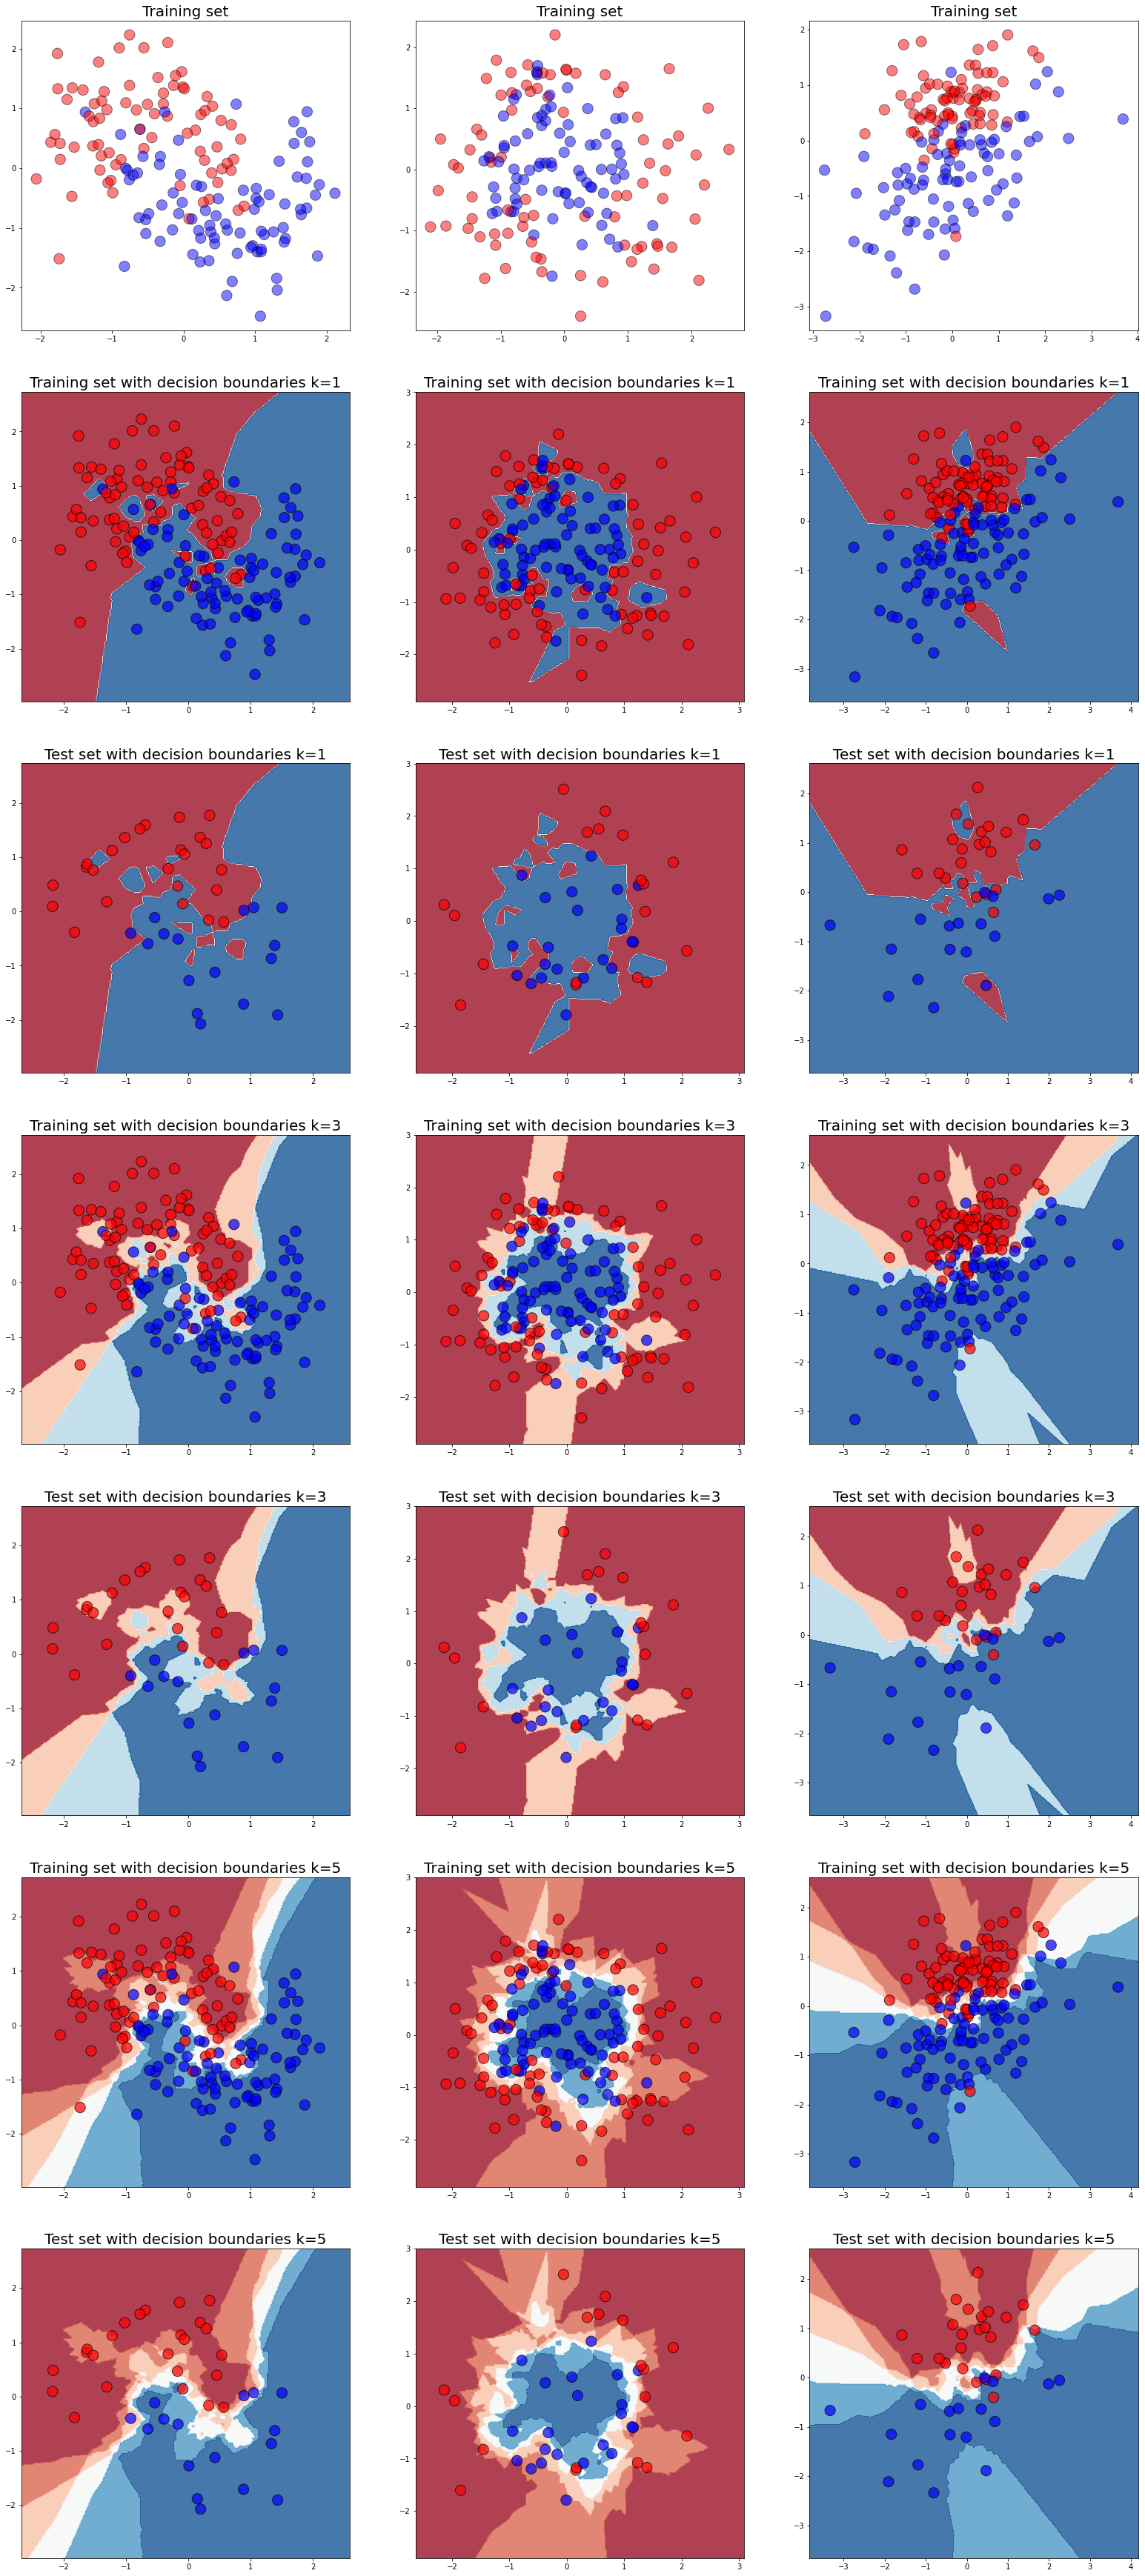

In [ ]:
figure = plt.figure(figsize=(27, 63))
fontsize_title = 20
figCount = 1
K = [1, 3, 5]
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y,
                                                        test_size=.2,
                                                        random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    #Plot training data
    ax = plt.subplot(1+2*len(K), len(datasets), figCount)
    ax.scatter(X_train[:, 0],
               X_train[:, 1],
               c=y_train,
               cmap=cm_bright,
               s=200,
               edgecolors='k',
               alpha=0.5)
    plt.title('Training set', fontsize=fontsize_title)
    
    for kdx, k in enumerate(K):
        # Plot training data & decision boundaries
        ax = plt.subplot(1+2*len(K), len(datasets), figCount+len(datasets)*(2*kdx+1))
        
        # kNN classifier
        clf = KNeighborsClassifier(k)
        # Build model
        clf.fit(X_train, y_train)
        
        # Classify
        score = clf.score(X_test, y_test)
        
        # Plot the decision boundary
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)

        # Plot training data
        ax = plt.scatter(X_train[:, 0],
                        X_train[:, 1],
                        c=y_train,
                        cmap=cm_bright,
                        s=200,
                        edgecolors='k',
                        alpha=0.7)
        
        plt.title(f'Training set with decision boundaries k={k}', fontsize=fontsize_title)
        
        
        # Plot test data with decision boundaries
        ax = plt.subplot(1+2*len(K), len(datasets), figCount+len(datasets)*(2*kdx+2))
        plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
        # Plot test data
        ax = plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c=y_test,
                        cmap=cm_bright,
                        s=200,
                        edgecolors='k',
                        alpha=0.7)
        
        plt.title(f'Test set with decision boundaries k={k}', fontsize=fontsize_title)
    
    figCount +=1 
# plt.tight_layout()
plt.show()

# Model complexity

## Classification problem

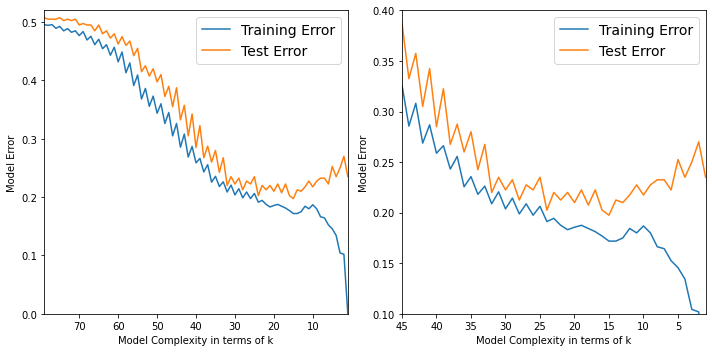

In [ ]:
random_states = np.arange(10)
K = np.arange(1, 80)
trainAccList = np.zeros(len(K))
testAccList = np.zeros(len(K))

for state in random_states:

    X, y = datasets[1]
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y,
                                                        test_size=.2,
                                                        random_state=state)

    for i, k in enumerate(K):
        # kNN classifier
        clf = KNeighborsClassifier(k)
        # clf = RandomForestClassifier(n_estimators=k)

        # Build model
        clf.fit(X_train, y_train)

        # Compute training accuracy
        trainAccList[i] += accuracy_score(y_train, clf.predict(X_train))

        # Compute test accuracy
        testAccList[i] += accuracy_score(y_test, clf.predict(X_test))
    
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(K, 1-(trainAccList/len(random_states)), label='Training Error')
ax[0].plot(K, 1-(testAccList/len(random_states)), label='Test Error')
ax[0].set_xlabel('Model Complexity in terms of k')
ax[0].set_ylabel('Model Error')
ax[0].invert_xaxis()
ax[0].legend(fontsize=14)
ax[0].set_xlim(max(K), min(K))
ax[0].set_ylim(0, 0.52)
ax[1].plot(K, 1-(trainAccList/len(random_states)), label='Training Error')
ax[1].plot(K, 1-(testAccList/len(random_states)), label='Test Error')
ax[1].set_xlabel('Model Complexity in terms of k')
ax[1].set_ylabel('Model Error')
ax[1].invert_xaxis()
ax[1].legend(fontsize=14)
ax[1].set_xlim(45, min(K))
ax[1].set_ylim(0.1, 0.4)
plt.tight_layout()
plt.show()